<a href="https://colab.research.google.com/github/mannickutd/learning_machine_learning/blob/master/tensorflow/tensorflow_2_0_basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow
!pip install tensorflow


Uninstalling tensorflow-2.0.0:
  Would remove:
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.0.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/app/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/audio/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/autograph/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/autograph/experimental/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v1/bitwise/__init__.py


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

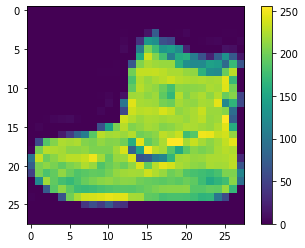

Class - Ankle boot


In [13]:
# Explore the shape of the data
print(train_images.shape)
# 60000 images by 28 by 28 pixel representation of the image
print(train_images[0])
print(train_labels.shape)
# Each cell represents a pixel from a range of 0 - 255.
# Lets see a sample train _image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# And the label
print(f'Class - {class_names[train_labels[0]]}')

In [0]:
# The model will need the cell values to be between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

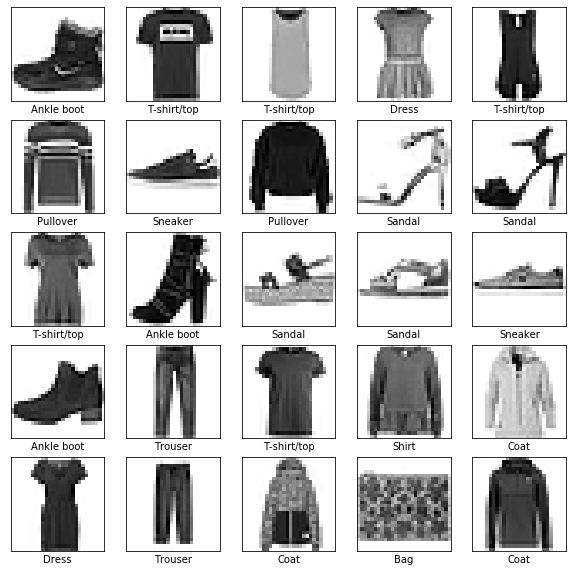

In [15]:
# Lets see a few of the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Lets create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# The first layer in this network, tf.keras.layers.Flatten,
# transforms the format of the images from a two-dimensional array (of 28 by 28 pixels)
# to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as 
# unstacking rows of pixels in the image and lining them up.
# This layer has no parameters to learn; it only reformats the data.

# After the pixels are flattened, the network consists of a sequence of two 
# tf.keras.layers.Dense layers. These are densely connected, or fully connected,
# neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last)
# layer is a 10-node softmax layer that returns an array of 10 probability scores that
# sum to 1. Each node contains a score that indicates the probability that the current
# image belongs to one of the 10 classes.

# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

# Loss function — This measures how accurate the model is during training.
#                 You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. The following example uses accuracy,
#           the fraction of the images that are correctly classified.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [19]:
# Train the images
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4956 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3706 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3346 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3106 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2929 - accuracy: 0.8925
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2784 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2669 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2560 - accuracy: 0.9056
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2452 - accuracy: 0.9091
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2425 - accuracy: 0.8850

Test accuracy: 0.885


[5.6144831e-09 2.1494553e-10 7.9921042e-11 6.9720037e-12 1.7649021e-11
 1.9391483e-03 3.3363454e-09 1.3790071e-03 9.0368202e-09 9.9668187e-01]
Ankle boot


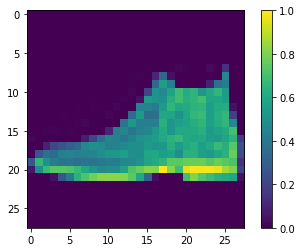

Ankle boot


In [27]:
# Get some inferences
predictions = model.predict(test_images)
# For each test image we should have a probability for each of the classes
print(predictions[0])
import numpy as np
# Which class does it predict for the image
print(class_names[np.argmax(predictions[0])])
# Lets have a look at the image
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# Hmm did it get it right?
print(class_names[test_labels[0]])

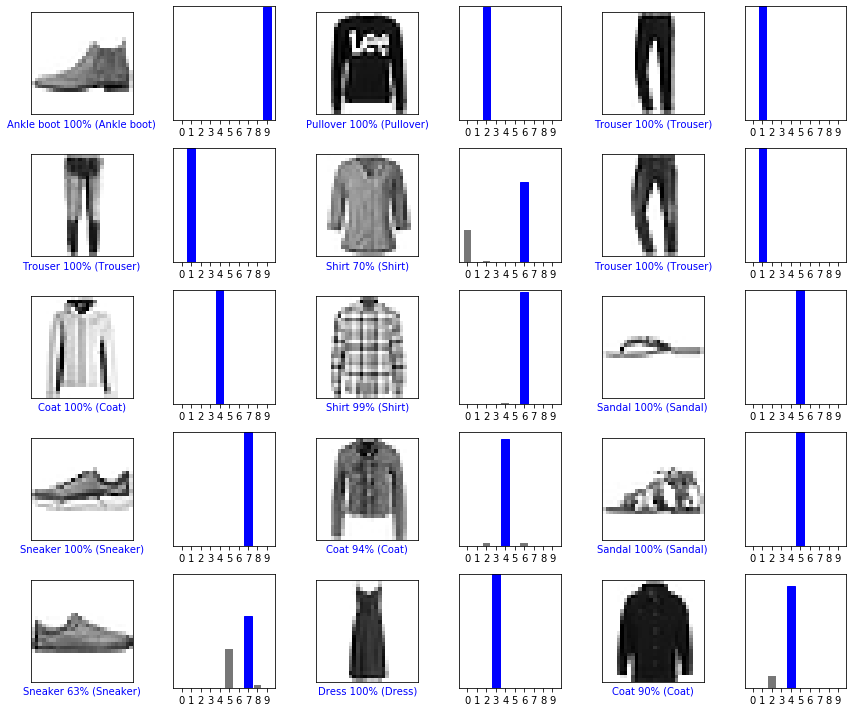

In [29]:
# Lets see how correctly it identifies each of the different classes
# Need a couple of helper methods

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [0]:
# Yah finished.